# Satellite Image Data Cleaning

## Imports and Setup

In [1]:
import pandas as pd
import geopandas as gpd

import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import visual_utils
from utils import config_utils

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%load_ext autoreload
%autoreload 2

## Data Configuration

In [2]:
iso_code = "MOZ"
config_file = os.path.join(os.getcwd(), 'configs/sat_configs/sat_config_500x500_60cm.yaml')
config = config_utils.load_config(config_file)

## Run Pre-trained Model

In [3]:
model_iso_code = "AF"
model_config_file = os.path.join(os.getcwd(), "configs/best_models.yaml")
model_configs = config_utils.create_config(model_config_file)

data = visual_utils.generate_predictions(iso_code, model_iso_code, model_configs)
data.head(3)

UID  source  iso     country  region  \
0  UNICEF-MOZ-SCHOOL-00000000  UNICEF  MOZ  Mozambique  Africa   
1  UNICEF-MOZ-SCHOOL-00000001  UNICEF  MOZ  Mozambique  Africa   
2  UNICEF-MOZ-SCHOOL-00000002  UNICEF  MOZ  Mozambique  Africa   

            subregion  name  giga_id_school  clean      prob  validated  \
0  Sub-Saharan Africa  None               0      0  0.949445          0   
1  Sub-Saharan Africa  None               1      0  0.236399          0   
2  Sub-Saharan Africa  None               2      0  0.056601         -1   

                     geometry  
0  POINT (35.10153 -17.41236)  
1  POINT (36.91100 -14.50489)  
2  POINT (38.90081 -15.34192)

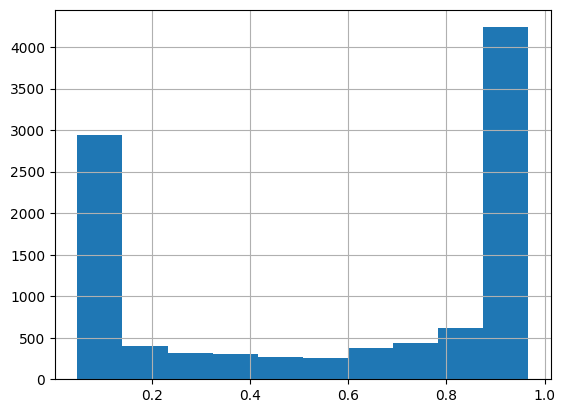

In [5]:
data['prob'].hist();

## Visualize Images

INFO:root:Data dimensions: (3904, 12)


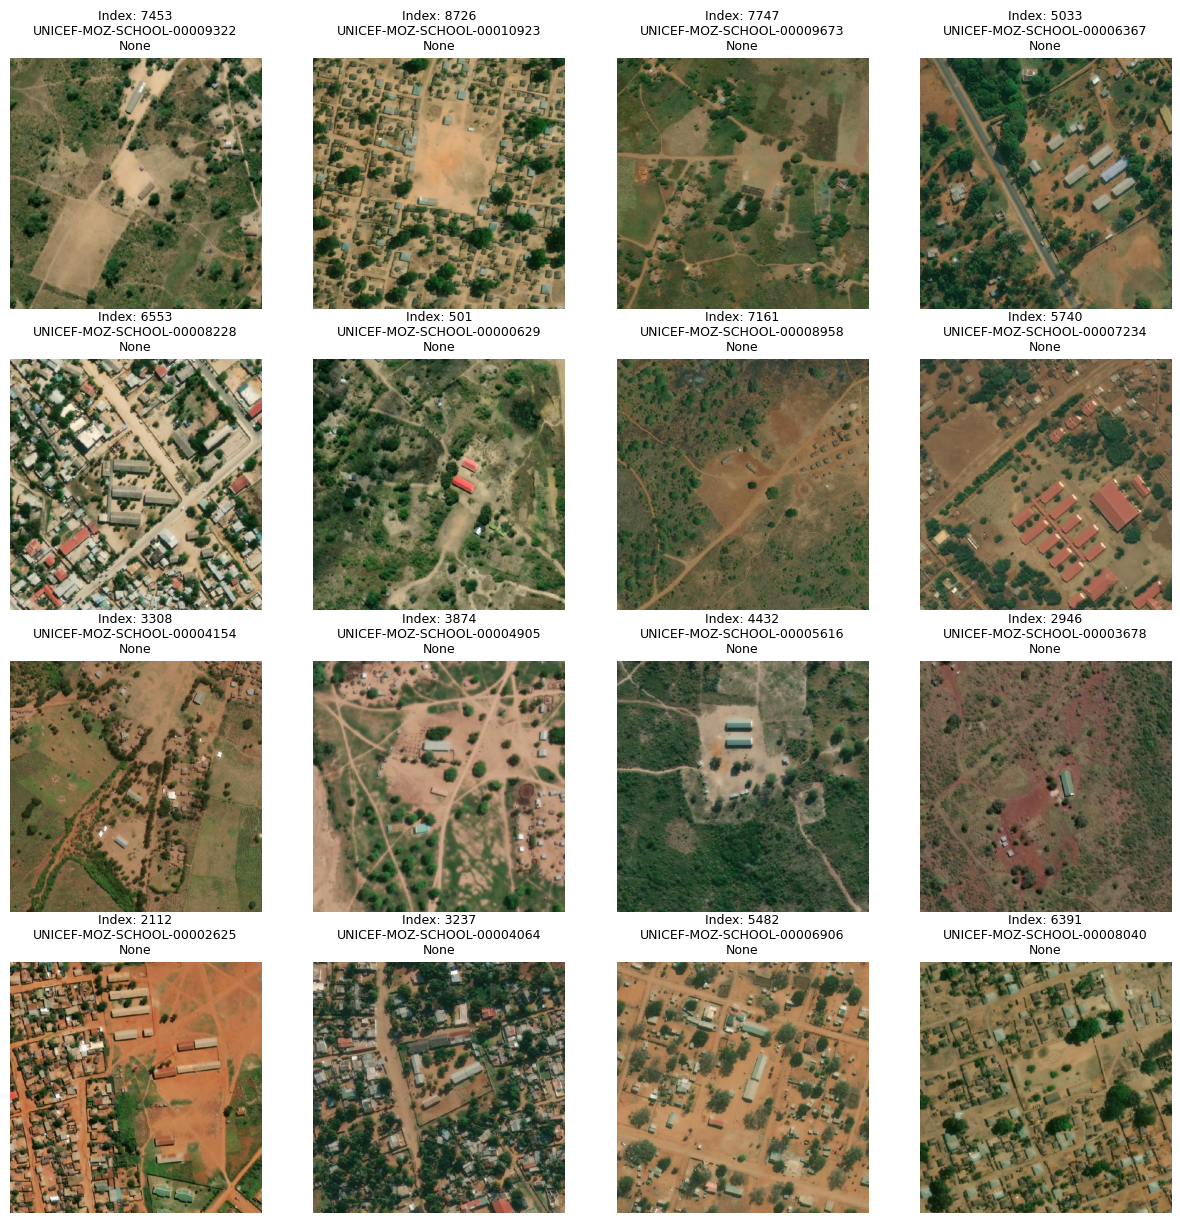

In [7]:
visual_utils.inspect_images(
    config, 
    iso_code=iso_code, 
    category="school", 
    start_index=16*50, 
    random=True, 
    min_prob=0.9,
    max_prob=1,
)

INFO:root:Data dimensions: (14318, 10)


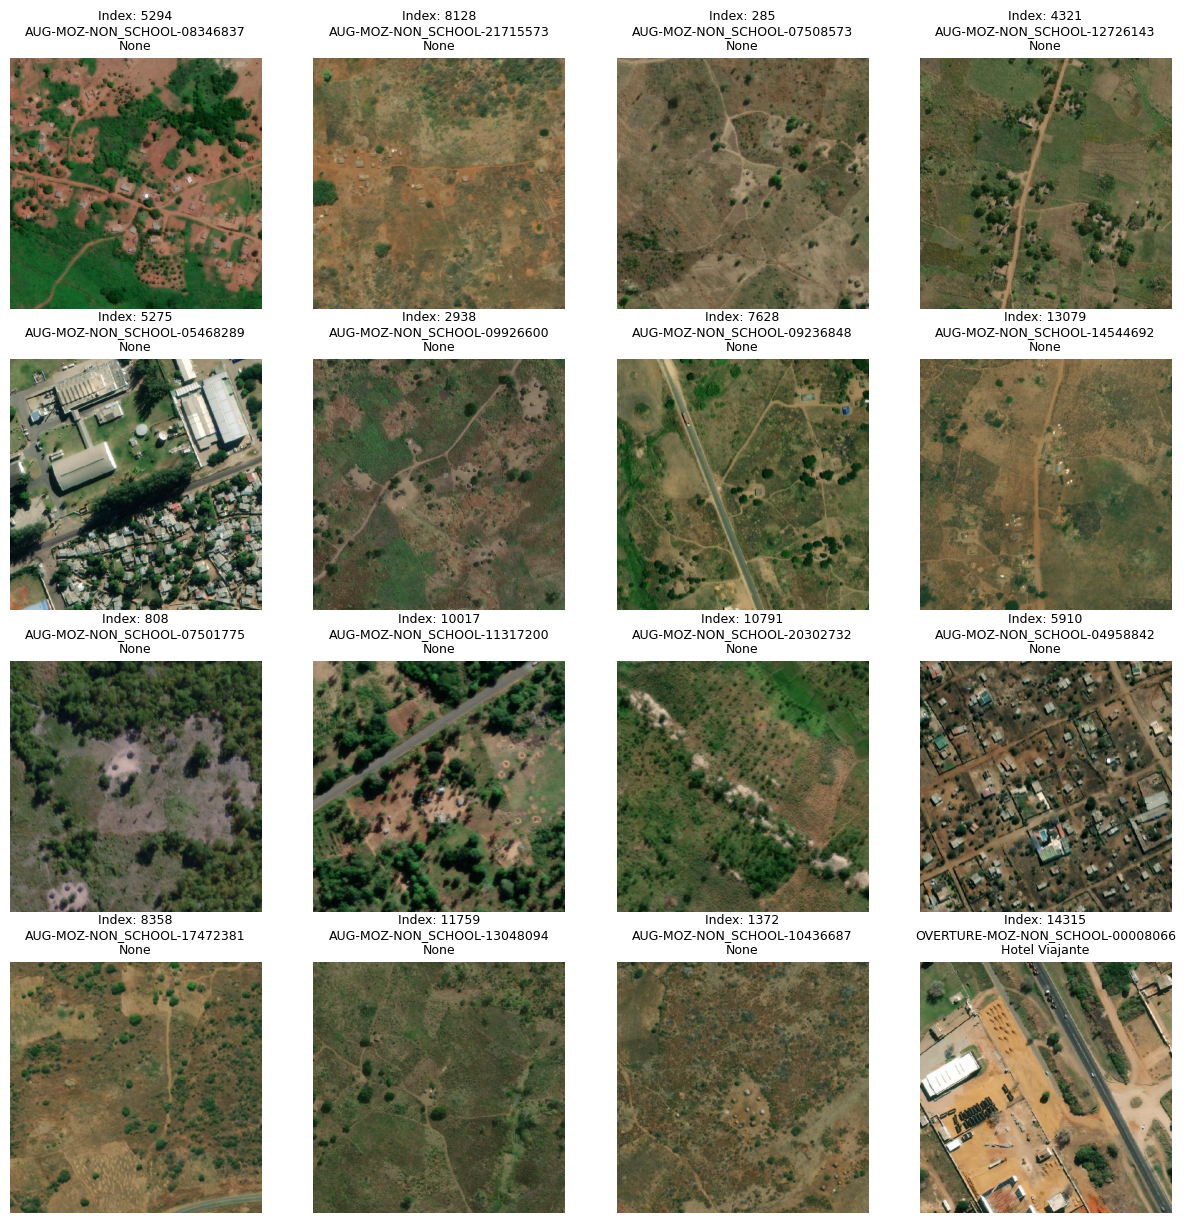

In [6]:
visual_utils.inspect_images(config, iso_code, category="non_school", start_index=16*10, random=True, suffix="")

## Inspect Points

In [359]:
index = 613
visual_utils.map_coordinates(config, index, category="school", iso_code=iso_code)

INFO:root:UNICEF-BRA-SCHOOL-00000787
INFO:root:CMEI POETA ALVARES DE AZEVEDO
INFO:root:CMEI POET ALVARES DE AZEVEDO


## Data Validation

In [8]:
visual_utils.validate_data(
    config, 
    iso_code, 
    category="school", 
    start_index=16*9, 
    show_validated=True,
    min_prob=0,
    max_prob=0.1
)

GridspecLayout(children=(Tab(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x…